In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df['male'] = (df['Gender'] == 'Male').astype('int') # True "iš principo" = 1, o False "iš principo" = 0
df

,User ID,Gender,Age,EstimatedSalary,Purchased,male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [27]:
X = df[['Age','EstimatedSalary', 'male']]
X

,Age,EstimatedSalary,male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [28]:
Y = df['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [29]:
sc = StandardScaler()


In [30]:
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [32]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LogisticRegression()
    model.fit(Xtrain , Ytrain)

    test_scores.append(model.score(Xtest , Ytest))

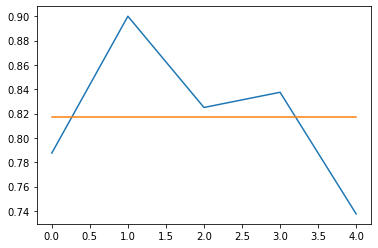

In [38]:
plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))

In [34]:
print(" Cross validation score : " , np.mean(test_scores))

 Cross validation score :  0.8175000000000001


In [36]:
test_scores

[0.7875, 0.9, 0.825, 0.8375, 0.7375]